In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models,layers

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

The CIFAR-10 dataset is pre-divided by default for machine learning purposes:
50,000 images are used for training the model.
10,000 images are used for testing the model.

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_test.shape

(10000, 1)

* 50000 = number of training images
* 32 = image height (in pixels)
* 32 = image width (in pixels)
* 3 = number of color channels (Red, Green, Blue → RGB)
and 
* 10000 = number of test labels (one for each test image)
* 1 = each label is a single number representing a class (like 0 to 9)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train= y_train.reshape(-1) #converting 2D array to 1D for simplifying the processing 

In [19]:
y_test = y_test.reshape(-1)


In [21]:
classes = ['airplane','automobile','bird', 'cat','deer','dog','frog','horse','ship','truck']
#pre defined classes of cifar-10 dataset

In [23]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


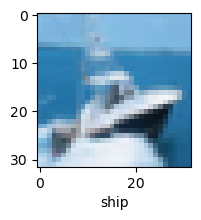

In [25]:
plot_sample(X_train,y_train,8)

In [27]:
X_train = X_train/255.0
X_test = X_test/255.0

In [28]:
ann = models.Sequential([
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [33]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.3064 - loss: 1.9292
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4199 - loss: 1.6451
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.4512 - loss: 1.5518
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.4753 - loss: 1.4872
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.4942 - loss: 1.4363


In [34]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification report:   \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
classification report:   
               precision    recall  f1-score   support

           0       0.43      0.69      0.53      1000
           1       0.71      0.42      0.53      1000
           2       0.47      0.14      0.22      1000
           3       0.41      0.17      0.24      1000
           4       0.37      0.52      0.43      1000
           5       0.40      0.41      0.40      1000
           6       0.50      0.60      0.54      1000
           7       0.51      0.58      0.55      1000
           8       0.60      0.61      0.61      1000
           9       0.49      0.65      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.46     10000
weighted avg       0.49      0.48      0.46     10000



In [ ]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.heatmap(y_pred,annot = True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('confusion matrix')
plt.show()

In [35]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [44]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.3804 - loss: 1.7022
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5959 - loss: 1.1425
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6562 - loss: 0.9802
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.6912 - loss: 0.8810
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7181 - loss: 0.8022
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7392 - loss: 0.7522
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7583 - loss: 0.6967
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7722 - loss: 0.6514
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7856 - loss: 0.6138
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.7990 - loss: 0.5705


In [45]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7087 - loss: 0.9173


[0.9271587133407593, 0.7016000151634216]

In [46]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [47]:
y_classes[:5]

[3, 8, 8, 0, 4]

In [48]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

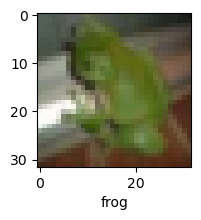

In [49]:
plot_sample(X_test,y_test,7)